In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from util import decode_npy

In [2]:
# data-relevant constants
DF = pd.read_csv('../data/main_table.csv')
FIGURE_PATH = '../figures'

GAIA_ID_COLNAME = 'source_id'
SDSS_ID_COLNAME = 'specObjId'

In [25]:
# plot fontsize settings

SMALL_FONT_SIZE = 16
MEDIUM_FONT_SIZE = 20
LARGE_FONT_SIZE = 20

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [97]:
BINSIZE_X, BINSIZE_Y = 5, 0.0015
MIN_WVL, MAX_WVL = 355, 1040

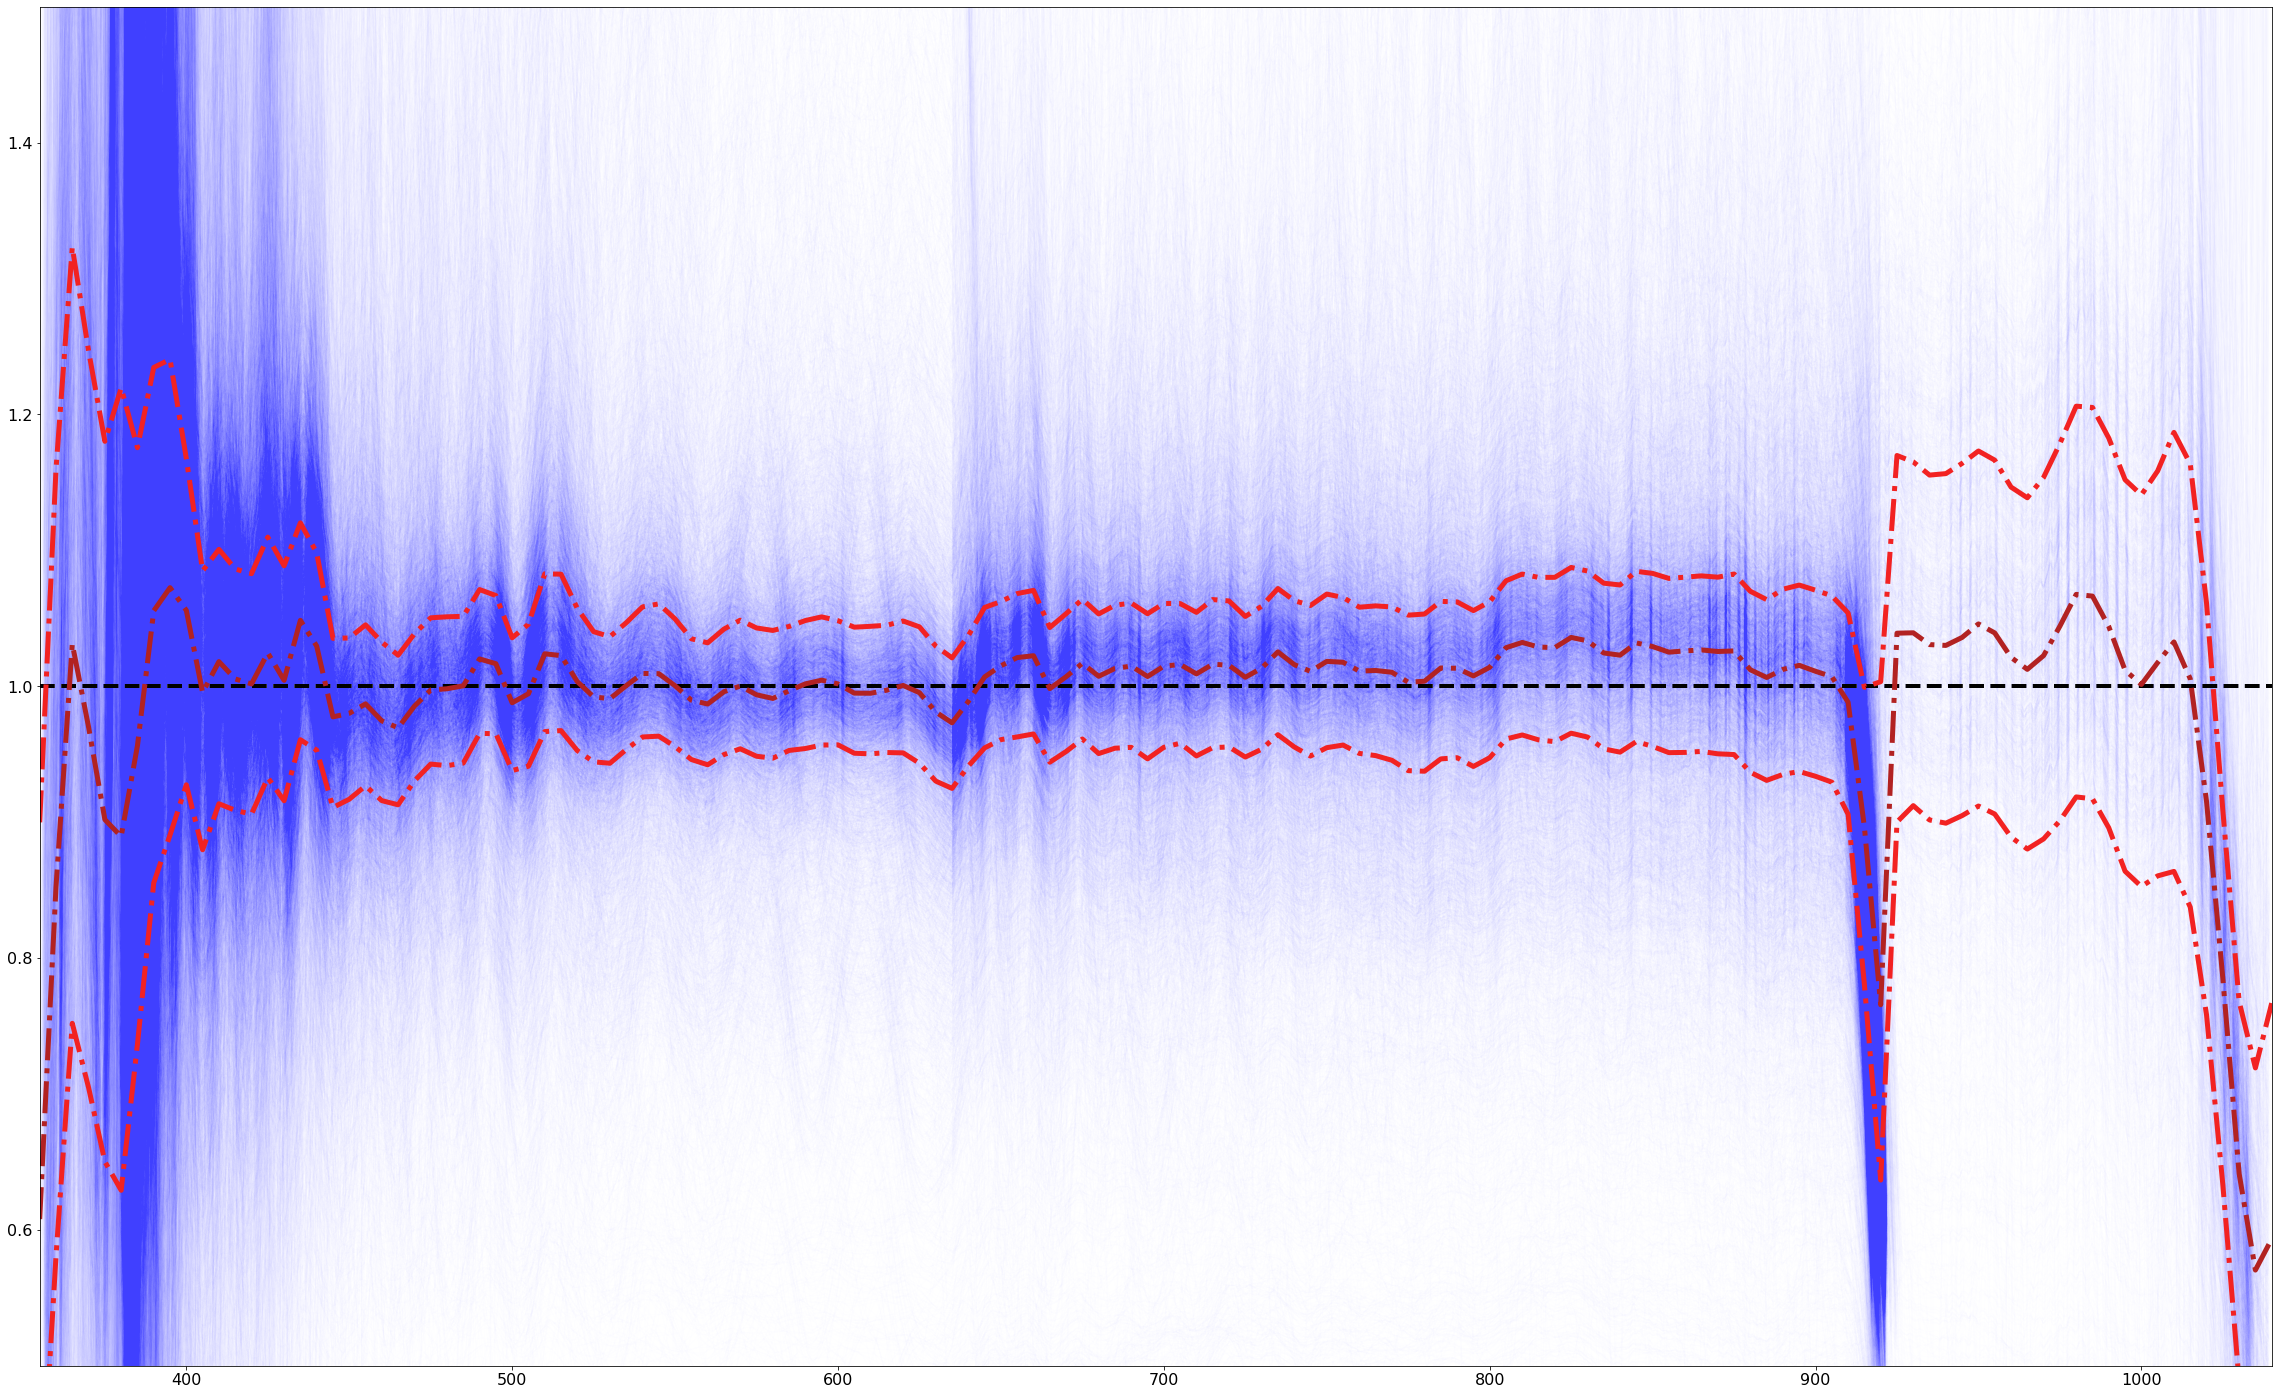

In [96]:
plt.figure(figsize=(40, 25))
plt.ylim(0.5, 1.5)
plt.axhline(1, c='#000000', lw=4, ls='--')

bin_centers = np.arange(MIN_WVL, MAX_WVL+1, BINSIZE_X)
binned_qs = { x: [] for x in bin_centers }

n_found, n_not_found = 0, 0
for gaia_id in DF[:][GAIA_ID_COLNAME]:
    try:
        sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
    except:
        print('Could not find an SDSS ID corresponding to the provided Gaia ID')
        continue

    try:
        spectra = decode_npy(f'../data/spectra/spectra_G{gaia_id}_S{sdss_id}.npy')
        n_found += 1
    except:
        n_not_found += 1
        continue
        
    sampling = spectra['sampling']
    qs = spectra['q']
    
    distances = np.abs(sampling[:, None] - bin_centers)
    indices = np.where(distances == np.minimum.reduce(distances, axis=1)[:, None])[1]
    bins = bin_centers[indices]
    
    for bin_, q in zip(bins, qs):
        binned_qs[bin_].append(q)
    
    plt.plot(sampling, qs, c='#4040ff01')
    
q_med = [ np.median(v) for v in binned_qs.values() ]
q_75 = [ np.quantile(v, 0.75) for v in binned_qs.values() ]
q_25 = [ np.quantile(v, 0.25) for v in binned_qs.values() ]
plt.plot(bin_centers, q_med, c='#b22222', lw=5, ls='-.')
plt.plot(bin_centers, q_25, c='#f22222', lw=5, ls='-.')
plt.plot(bin_centers, q_75, c='#f22222', lw=5, ls='-.')
        
plt.xlim(MIN_WVL, MAX_WVL)
plt.show()

In [93]:
np.median(q_med), np.mean(q_med)

(1.0106581240191974, 0.9927835451151413)